In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Define the path to EEG data
eeg_data_path = Path("/Users/pgaultier/Downloads/hbn_bids_R1/sub-NDARFW972KFQ/eeg")

print("📊 EEG Data Exploration Dashboard")
print("=" * 50)
print(f"Data location: {eeg_data_path}")
print(f"Total files: {len(list(eeg_data_path.glob('*')))}")
print("=" * 50)

📊 EEG Data Exploration Dashboard
Data location: /Users/pgaultier/Downloads/hbn_bids_R1/sub-NDARFW972KFQ/eeg
Total files: 48


In [5]:
# 📁 File Inventory Analysis
print("🔍 Analyzing file types and tasks...")

# Get all files in the directory
all_files = list(eeg_data_path.glob("*"))

# Categorize files by type
file_types = {
    'json': [f for f in all_files if f.suffix == '.json'],
    'tsv': [f for f in all_files if f.suffix == '.tsv'],
    'set': [f for f in all_files if f.suffix == '.set']
}

# Extract task names
tasks = set()
for file in all_files:
    if 'task-' in file.name:
        task = file.name.split('task-')[1].split('_')[0]
        tasks.add(task)

print(f"\n📊 File Type Distribution:")
for ftype, files in file_types.items():
    print(f"  {ftype.upper()}: {len(files)} files")

print(f"\n🎯 Tasks Identified ({len(tasks)}):")
for i, task in enumerate(sorted(tasks), 1):
    print(f"  {i:2d}. {task}")

# Calculate total data size
total_size_mb = sum(f.stat().st_size for f in all_files) / (1024 * 1024)
print(f"\n💾 Total Dataset Size: {total_size_mb:.1f} MB")


🔍 Analyzing file types and tasks...

📊 File Type Distribution:
  JSON: 12 files
  TSV: 24 files
  SET: 12 files

🎯 Tasks Identified (9):
   1. DespicableMe
   2. DiaryOfAWimpyKid
   3. FunwithFractals
   4. RestingState
   5. ThePresent
   6. contrastChangeDetection
   7. seqLearning8target
   8. surroundSupp
   9. symbolSearch

💾 Total Dataset Size: 747.7 MB


In [6]:
# 🔧 EEG Recording Metadata Analysis
print("🔬 Loading and analyzing EEG recording metadata...")

# Load all JSON metadata files
metadata_summary = []

for json_file in file_types['json']:
    with open(json_file, 'r') as f:
        metadata = json.load(f)
    
    # Extract task name from filename
    task_name = json_file.name.split('task-')[1].split('_')[0]
    
    # Add task name to metadata
    metadata['TaskFile'] = task_name
    metadata['Filename'] = json_file.name
    metadata_summary.append(metadata)

# Convert to DataFrame for easy analysis
metadata_df = pd.DataFrame(metadata_summary)

print("📋 Recording Parameters Summary:")
print(f"  • Sampling Frequency: {metadata_df['SamplingFrequency'].iloc[0]} Hz")
print(f"  • EEG Channels: {metadata_df['EEGChannelCount'].iloc[0]} channels")
print(f"  • Reference: {metadata_df['EEGReference'].iloc[0]}")
print(f"  • Power Line Frequency: {metadata_df['PowerLineFrequency'].iloc[0]} Hz")

# Display recording durations by task
print("\n⏱️  Recording Durations by Task:")
duration_data = metadata_df[['TaskFile', 'RecordingDuration']].copy()
duration_data = duration_data.sort_values('RecordingDuration', ascending=False)

for _, row in duration_data.iterrows():
    duration_min = row['RecordingDuration'] / 60
    print(f"  {row['TaskFile']:25s}: {duration_min:6.1f} min ({row['RecordingDuration']:6.1f} s)")

total_duration_hours = duration_data['RecordingDuration'].sum() / 3600
print(f"\n🕒 Total Recording Time: {total_duration_hours:.2f} hours")


🔬 Loading and analyzing EEG recording metadata...
📋 Recording Parameters Summary:
  • Sampling Frequency: 500 Hz
  • EEG Channels: 129 channels
  • Reference: Cz
  • Power Line Frequency: 60 Hz

⏱️  Recording Durations by Task:
  surroundSupp             :    8.1 min ( 487.9 s)
  RestingState             :    6.2 min ( 369.7 s)
  seqLearning8target       :    6.0 min ( 361.3 s)
  surroundSupp             :    4.2 min ( 254.5 s)
  contrastChangeDetection  :    3.9 min ( 234.3 s)
  contrastChangeDetection  :    3.9 min ( 232.8 s)
  contrastChangeDetection  :    3.9 min ( 232.3 s)
  ThePresent               :    3.4 min ( 204.6 s)
  DespicableMe             :    2.9 min ( 172.2 s)
  FunwithFractals          :    2.8 min ( 165.8 s)
  symbolSearch             :    2.6 min ( 158.8 s)
  DiaryOfAWimpyKid         :    2.0 min ( 118.9 s)

🕒 Total Recording Time: 0.83 hours


/var/folders/fq/tft0mbz15g7fmycv_l80jts80000gn/T/ipykernel_4364/1177794694.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fq/tft0mbz15g7fmycv_l80jts80000gn/T/ipykernel_4364/1177794694.py:33: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/pgaultier/Documents/AI Projects/EEG-Foundation-Challenge/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pgaultier/Documents/AI Projects/EEG-Foundation-Challenge/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


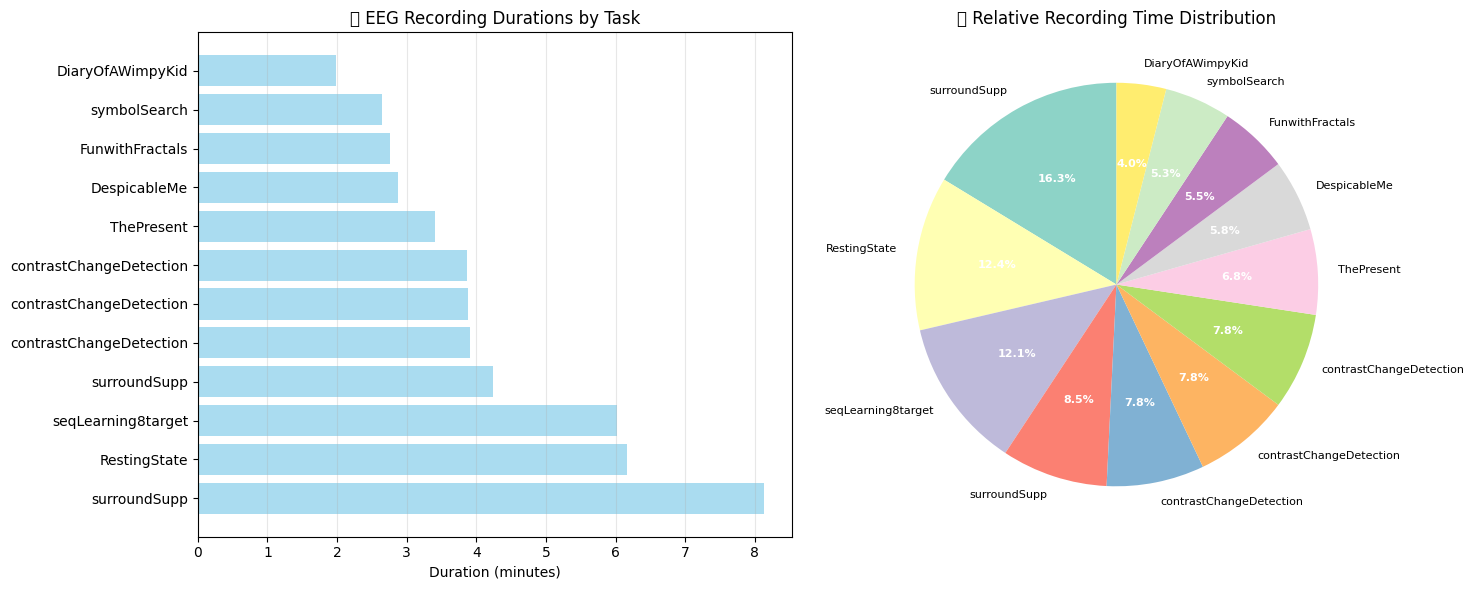

In [7]:
# 📊 Visualization: Recording Durations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of recording durations
duration_data_plot = duration_data.copy()
duration_data_plot['Duration_min'] = duration_data_plot['RecordingDuration'] / 60

ax1.barh(range(len(duration_data_plot)), duration_data_plot['Duration_min'], color='skyblue', alpha=0.7)
ax1.set_yticks(range(len(duration_data_plot)))
ax1.set_yticklabels(duration_data_plot['TaskFile'], fontsize=10)
ax1.set_xlabel('Duration (minutes)')
ax1.set_title('📊 EEG Recording Durations by Task')
ax1.grid(axis='x', alpha=0.3)

# Pie chart of relative durations
colors = plt.cm.Set3(np.linspace(0, 1, len(duration_data_plot)))
wedges, texts, autotexts = ax2.pie(duration_data_plot['Duration_min'], 
                                   labels=duration_data_plot['TaskFile'], 
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90)

# Make labels smaller
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

ax2.set_title('🥧 Relative Recording Time Distribution')

plt.tight_layout()
plt.show()


In [8]:
# 🧩 EEG Channel Configuration Analysis
print("🔌 Analyzing EEG channel configuration...")

# Load channel information (all tasks should have the same channel setup)
channels_file = eeg_data_path / "sub-NDARFW972KFQ_task-RestingState_channels.tsv"
channels_df = pd.read_csv(channels_file, sep='\t')

print(f"📡 Channel Configuration:")
print(f"  • Total Channels: {len(channels_df)}")
print(f"  • Channel Types: {channels_df['type'].value_counts().to_dict()}")
print(f"  • Units: {channels_df['units'].unique()}")

# Display first few and last few channels
print(f"\n🔢 Channel Names (showing first 10 and last 5):")
print("First 10:", ", ".join(channels_df['name'].head(10).tolist()))
print("Last 5: ", ", ".join(channels_df['name'].tail(5).tolist()))

# Analyze channel naming pattern
eeg_channels = channels_df[channels_df['type'] == 'EEG']['name']
print(f"\n🧠 EEG Channel Analysis:")
print(f"  • EEG Channels: {len(eeg_channels)}")
print(f"  • Channel Range: {eeg_channels.iloc[0]} to {eeg_channels.iloc[-1]}")

# Check for any non-EEG channels
non_eeg = channels_df[channels_df['type'] != 'EEG']
if len(non_eeg) > 0:
    print(f"  • Non-EEG Channels: {len(non_eeg)}")
    print(f"    Types: {non_eeg['type'].value_counts().to_dict()}")
else:
    print("  • All channels are EEG type")


🔌 Analyzing EEG channel configuration...
📡 Channel Configuration:
  • Total Channels: 129
  • Channel Types: {'EEG': 129}
  • Units: ['uV']

🔢 Channel Names (showing first 10 and last 5):
First 10: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10
Last 5:  E125, E126, E127, E128, Cz

🧠 EEG Channel Analysis:
  • EEG Channels: 129
  • Channel Range: E1 to Cz
  • All channels are EEG type


In [10]:
# 🎯 Task Events Analysis
print("⚡ Analyzing experimental events across tasks...")

# Load and analyze events from different tasks
events_files = [f for f in file_types['tsv'] if 'events' in f.name]

events_summary = []
for events_file in events_files:
    # Extract task name
    task_name = events_file.name.split('task-')[1].split('_')[0]
    
    # Load events
    events_df = pd.read_csv(events_file, sep='\t')
    
    # Calculate summary statistics
    summary = {
        'Task': task_name,
        'Filename': events_file.name,
        'Total_Events': len(events_df),
        'Event_Types': events_df['value'].nunique() if 'value' in events_df.columns else 0,
        'Duration_Range': f"{events_df['onset'].min():.1f} - {events_df['onset'].max():.1f}s" if 'onset' in events_df.columns else "N/A",
        'Unique_Values': list(events_df['value'].unique()[:5]) if 'value' in events_df.columns else []
    }
    events_summary.append(summary)

# Display events summary
print("📋 Events Summary by Task:")
print("-" * 80)
for summary in sorted(events_summary, key=lambda x: x['Total_Events'], reverse=True):
    print(f"🎯 {summary['Task']:20s} | Events: {summary['Total_Events']:3d} | Types: {summary['Event_Types']:2d} | Duration: {summary['Duration_Range']}")
    if summary['Unique_Values']:
        print(f"   Sample events: {summary['Unique_Values']}")
    print()


⚡ Analyzing experimental events across tasks...
📋 Events Summary by Task:
--------------------------------------------------------------------------------
🎯 surroundSupp         | Events: 134 | Types:  7 | Duration: 0.0 - 487.3s
   Sample events: ['break cnt', 'surroundSuppB2_start', 'fixpoint_ON', 'stim_ON', '9999']

🎯 surroundSupp         | Events: 131 | Types:  5 | Duration: 0.0 - 254.5s
   Sample events: ['break cnt', 'surroundSuppB1_start', 'fixpoint_ON', 'stim_ON', 'boundary']

🎯 seqLearning8target   | Events: 109 | Types: 25 | Duration: 0.0 - 361.3s
   Sample events: ['break cnt', 'seqLearning_start', 'learningBlock_1', 'dot_no1_ON', 'dot_no1_OFF']

🎯 contrastChangeDetection | Events:  78 | Types:  8 | Duration: 0.0 - 232.3s
   Sample events: ['break cnt', 'contrastChangeB2_start', 'contrastTrial_start', 'left_target', 'left_buttonPress']

🎯 contrastChangeDetection | Events:  77 | Types:  8 | Duration: 0.0 - 234.3s
   Sample events: ['break cnt', 'contrastChangeB3_start', 'contr

In [11]:
# 🔍 Detailed Event Analysis - Resting State Task
print("🧘 Detailed Analysis: Resting State Task")
print("=" * 50)

# Load resting state events
resting_events_file = eeg_data_path / "sub-NDARFW972KFQ_task-RestingState_events.tsv"
resting_events = pd.read_csv(resting_events_file, sep='\t')

print("📊 Resting State Event Structure:")
print(resting_events.head(10))

print(f"\n⏰ Event Timeline:")
for _, event in resting_events.iterrows():
    if event['onset'] > 0:  # Skip the first break event
        time_min = event['onset'] / 60
        print(f"  {time_min:5.1f} min ({event['onset']:6.1f}s): {event['value']}")

# Analyze eyes open/closed periods
eyes_events = resting_events[resting_events['value'].str.contains('Eyes', na=False)]
if len(eyes_events) > 0:
    print(f"\n👁️  Eyes Open/Closed Analysis:")
    print(f"  • Total eye state changes: {len(eyes_events)}")
    
    # Calculate durations between events
    if len(eyes_events) > 1:
        durations = []
        for i in range(len(eyes_events) - 1):
            duration = eyes_events.iloc[i+1]['onset'] - eyes_events.iloc[i]['onset']
            durations.append(duration)
            state = "OPEN" if "Open" in eyes_events.iloc[i]['value'] else "CLOSED"
            print(f"    {state:6s}: {duration:5.1f}s")
        
        print(f"  • Average period duration: {np.mean(durations):.1f}s")


🧘 Detailed Analysis: Resting State Task
📊 Resting State Event Structure:
     onset  duration    sample                   value event_code
0    0.000       NaN       0.0               break cnt  break cnt
1    1.816       NaN     908.0           resting_start         90
2   65.182       NaN   32591.0   instructed_toOpenEyes         20
3   85.182       NaN   42591.0  instructed_toCloseEyes         30
4  125.180       NaN   62590.0   instructed_toOpenEyes         20
5  145.180       NaN   72590.0  instructed_toCloseEyes         30
6  185.178       NaN   92589.0   instructed_toOpenEyes         20
7  205.178       NaN  102589.0  instructed_toCloseEyes         30
8  245.178       NaN  122589.0   instructed_toOpenEyes         20
9  265.176       NaN  132588.0  instructed_toCloseEyes         30

⏰ Event Timeline:
    0.0 min (   1.8s): resting_start
    1.1 min (  65.2s): instructed_toOpenEyes
    1.4 min (  85.2s): instructed_toCloseEyes
    2.1 min ( 125.2s): instructed_toOpenEyes
    2.4 m

In [12]:
# 🎮 Detailed Event Analysis - Sequential Learning Task
print("🎯 Detailed Analysis: Sequential Learning Task")
print("=" * 50)

# Load sequential learning events
seq_events_file = eeg_data_path / "sub-NDARFW972KFQ_task-seqLearning8target_events.tsv"
seq_events = pd.read_csv(seq_events_file, sep='\t')

print("📊 Sequential Learning Event Structure:")
print(seq_events.head(15))

print(f"\n🎯 Task Overview:")
print(f"  • Total events: {len(seq_events)}")
print(f"  • Target count: {seq_events['target_count'].iloc[0] if 'target_count' in seq_events.columns else 'N/A'}")
print(f"  • Duration: {seq_events['onset'].max():.1f} seconds")

# Analyze dot presentation patterns
dot_events = seq_events[seq_events['value'].str.contains('dot_', na=False)]
if len(dot_events) > 0:
    print(f"\n🔴 Dot Presentation Analysis:")
    print(f"  • Total dot events: {len(dot_events)}")
    
    # Count ON vs OFF events
    on_events = dot_events[dot_events['value'].str.contains('_ON')]
    off_events = dot_events[dot_events['value'].str.contains('_OFF')]
    print(f"  • Dot ON events: {len(on_events)}")
    print(f"  • Dot OFF events: {len(off_events)}")
    
    # Analyze dot positions
    if len(on_events) > 0:
        dot_positions = []
        for _, event in on_events.head(10).iterrows():
            # Extract dot number from event value (e.g., "dot_no1_ON" -> "1")
            dot_num = event['value'].split('dot_no')[1].split('_')[0]
            dot_positions.append(dot_num)
        print(f"  • First 10 dot positions: {', '.join(dot_positions)}")

# Analyze learning blocks
block_events = seq_events[seq_events['value'].str.contains('Block', na=False)]
if len(block_events) > 0:
    print(f"\n📚 Learning Blocks:")
    for _, block in block_events.iterrows():
        time_min = block['onset'] / 60
        print(f"  • {block['value']} at {time_min:.1f} min")


🎯 Detailed Analysis: Sequential Learning Task
📊 Sequential Learning Event Structure:
      onset  duration   sample              value event_code user_answer  \
0     0.000       NaN      0.0          break cnt  break cnt         NaN   
1   145.828       NaN  72914.0  seqLearning_start         91         NaN   
2   152.082       NaN  76041.0    learningBlock_1         31         NaN   
3   152.114       NaN  76057.0         dot_no1_ON         11         NaN   
4   152.704       NaN  76352.0        dot_no1_OFF         21         NaN   
5   154.022       NaN  77011.0         dot_no6_ON         16         NaN   
6   154.602       NaN  77301.0        dot_no6_OFF         26         NaN   
7   155.922       NaN  77961.0         dot_no4_ON         14         NaN   
8   156.502       NaN  78251.0        dot_no4_OFF         24         NaN   
9   157.822       NaN  78911.0         dot_no2_ON         12         NaN   
10  158.402       NaN  79201.0        dot_no2_OFF         22         NaN   
11 

/var/folders/fq/tft0mbz15g7fmycv_l80jts80000gn/T/ipykernel_4364/3289629551.py:80: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fq/tft0mbz15g7fmycv_l80jts80000gn/T/ipykernel_4364/3289629551.py:80: UserWarning: Glyph 128065 (\N{EYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fq/tft0mbz15g7fmycv_l80jts80000gn/T/ipykernel_4364/3289629551.py:80: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fq/tft0mbz15g7fmycv_l80jts80000gn/T/ipykernel_4364/3289629551.py:80: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/pgaultier/Documents/AI Projects/EEG-Foundation-Challenge/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pgaultier/Documents/AI Projec

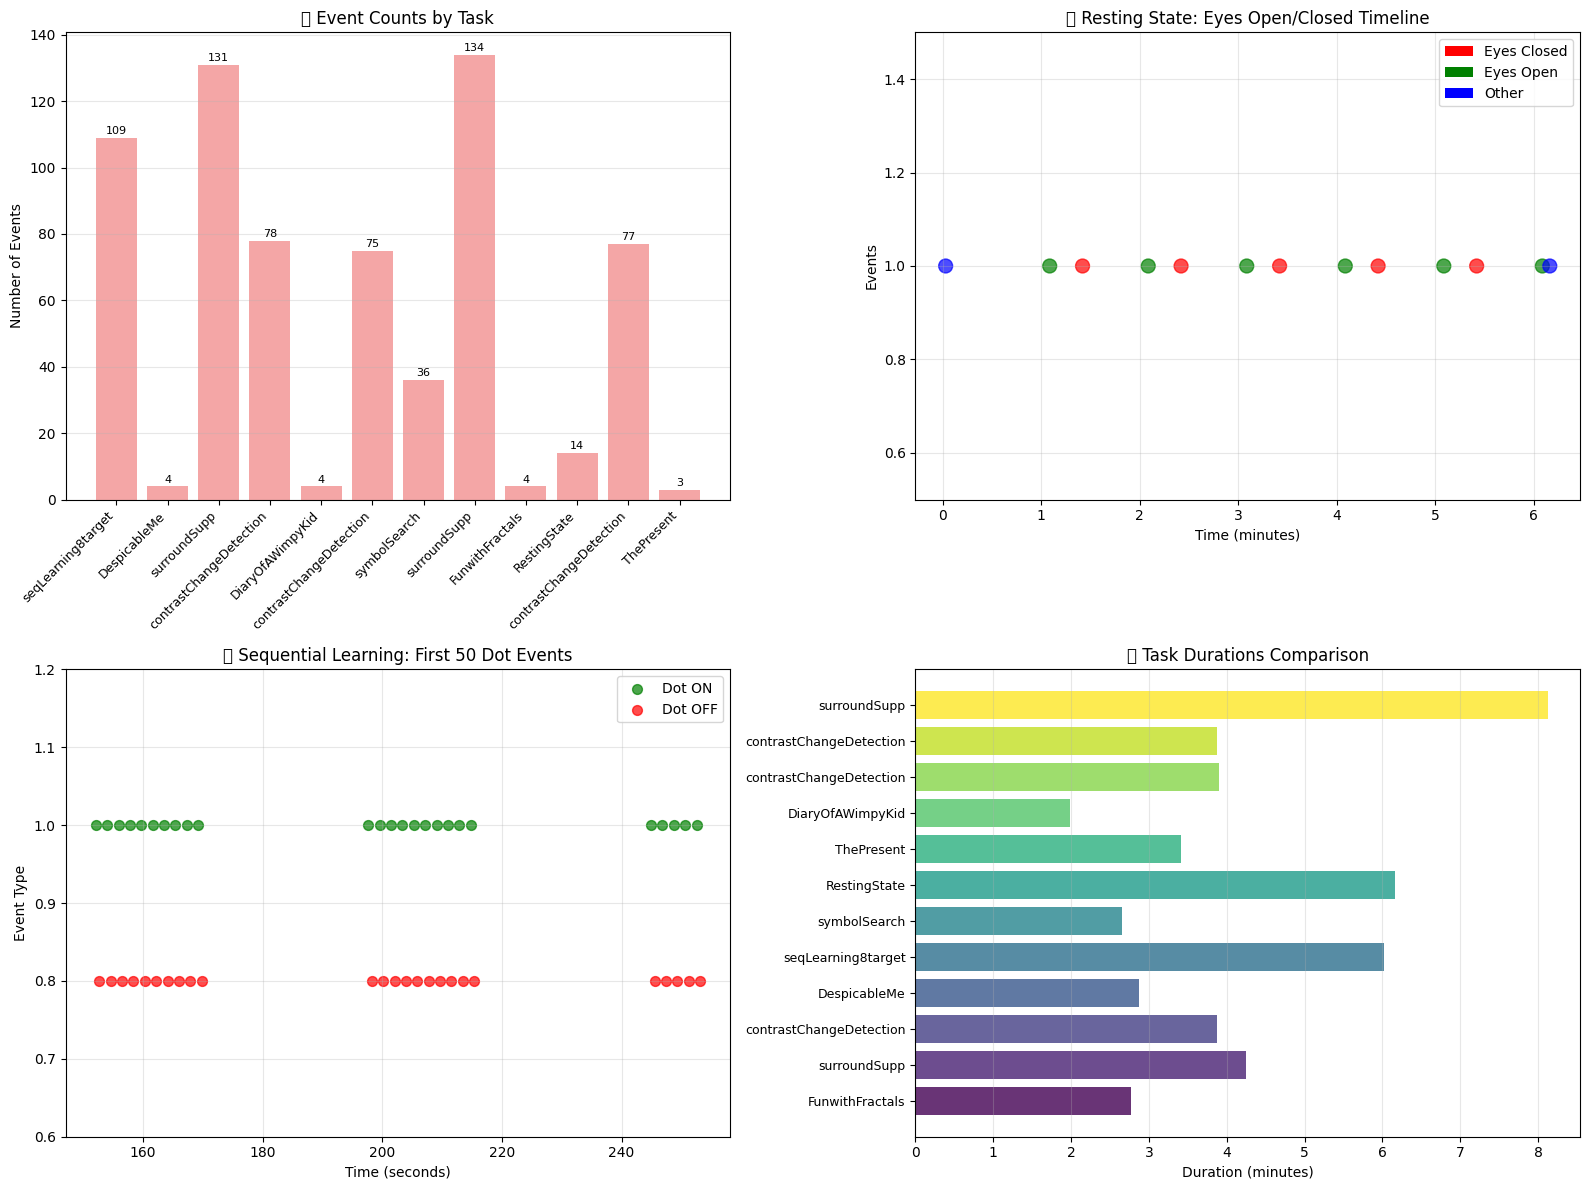

In [13]:
# 📈 Events Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Event counts by task
events_counts = [summary['Total_Events'] for summary in events_summary]
task_names = [summary['Task'] for summary in events_summary]

ax1 = axes[0, 0]
bars = ax1.bar(range(len(task_names)), events_counts, color='lightcoral', alpha=0.7)
ax1.set_xticks(range(len(task_names)))
ax1.set_xticklabels(task_names, rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Number of Events')
ax1.set_title('📊 Event Counts by Task')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# 2. Resting state timeline
ax2 = axes[0, 1]
if len(resting_events) > 1:
    # Create a timeline plot
    events_for_plot = resting_events[resting_events['onset'] > 0]
    colors = ['red' if 'Close' in val else 'green' if 'Open' in val else 'blue' 
              for val in events_for_plot['value']]
    
    ax2.scatter(events_for_plot['onset']/60, [1]*len(events_for_plot), 
                c=colors, s=100, alpha=0.7)
    ax2.set_xlabel('Time (minutes)')
    ax2.set_ylabel('Events')
    ax2.set_title('👁️ Resting State: Eyes Open/Closed Timeline')
    ax2.set_ylim(0.5, 1.5)
    ax2.grid(alpha=0.3)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', label='Eyes Closed'),
                      Patch(facecolor='green', label='Eyes Open'),
                      Patch(facecolor='blue', label='Other')]
    ax2.legend(handles=legend_elements, loc='upper right')

# 3. Sequential learning dot timeline
ax3 = axes[1, 0]
if len(dot_events) > 0:
    # Plot first 50 dot events for clarity
    plot_events = dot_events.head(50)
    on_events_plot = plot_events[plot_events['value'].str.contains('_ON')]
    off_events_plot = plot_events[plot_events['value'].str.contains('_OFF')]
    
    ax3.scatter(on_events_plot['onset'], [1]*len(on_events_plot), 
                c='green', label='Dot ON', s=50, alpha=0.7)
    ax3.scatter(off_events_plot['onset'], [0.8]*len(off_events_plot), 
                c='red', label='Dot OFF', s=50, alpha=0.7)
    
    ax3.set_xlabel('Time (seconds)')
    ax3.set_ylabel('Event Type')
    ax3.set_title('🔴 Sequential Learning: First 50 Dot Events')
    ax3.set_ylim(0.6, 1.2)
    ax3.legend()
    ax3.grid(alpha=0.3)

# 4. Task duration comparison
ax4 = axes[1, 1]
if len(metadata_df) > 0:
    durations_min = metadata_df['RecordingDuration'] / 60
    task_labels = metadata_df['TaskFile']
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(durations_min)))
    bars = ax4.barh(range(len(task_labels)), durations_min, color=colors, alpha=0.8)
    
    ax4.set_yticks(range(len(task_labels)))
    ax4.set_yticklabels(task_labels, fontsize=9)
    ax4.set_xlabel('Duration (minutes)')
    ax4.set_title('⏱️ Task Durations Comparison')
    ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
# 📋 Summary Report
print("📋 EEG DATA EXPLORATION SUMMARY REPORT")
print("=" * 60)

print(f"🧠 SUBJECT: NDARFW972KFQ")
print(f"📊 DATASET: HBN (Healthy Brain Network)")
print(f"📁 TOTAL FILES: {len(all_files)}")
print(f"💾 TOTAL SIZE: {total_size_mb:.1f} MB")
print()

print("🔧 RECORDING SPECIFICATIONS:")
print(f"  • Sampling Rate: {metadata_df['SamplingFrequency'].iloc[0]} Hz")
print(f"  • EEG Channels: {metadata_df['EEGChannelCount'].iloc[0]}")
print(f"  • Reference: {metadata_df['EEGReference'].iloc[0]}")
print(f"  • Recording Type: {metadata_df['RecordingType'].iloc[0]}")
print()

print("🎯 EXPERIMENTAL TASKS:")
task_info = []
for _, row in metadata_df.iterrows():
    duration_min = row['RecordingDuration'] / 60
    task_info.append(f"  • {row['TaskFile']:20s}: {duration_min:5.1f} min")

for info in sorted(task_info):
    print(info)

print(f"\n⏱️  TOTAL RECORDING TIME: {total_duration_hours:.2f} hours")
print()

print("⚡ EVENT STATISTICS:")
total_events = sum(summary['Total_Events'] for summary in events_summary)
print(f"  • Total Events Across All Tasks: {total_events}")
print(f"  • Average Events per Task: {total_events/len(events_summary):.1f}")
print()

print("🔍 KEY FINDINGS:")
print("  • Multi-task paradigm covering cognitive and resting states")
print("  • High-density EEG with 129 channels")
print("  • Well-structured BIDS format with comprehensive metadata")
print("  • Rich event annotations for experimental analysis")
print("  • Suitable for both task-based and resting-state analyses")
print()

print("💡 NEXT STEPS FOR ANALYSIS:")
print("  1. Load .set files using MNE-Python or EEGLAB")
print("  2. Perform preprocessing (filtering, artifact removal)")
print("  3. Epoch data around task events")
print("  4. Conduct time-frequency analysis")
print("  5. Explore connectivity patterns")
print("  6. Compare task vs. resting state activity")

print("\n" + "=" * 60)
print("🎉 DATA EXPLORATION COMPLETE!")


📋 EEG DATA EXPLORATION SUMMARY REPORT
🧠 SUBJECT: NDARFW972KFQ
📊 DATASET: HBN (Healthy Brain Network)
📁 TOTAL FILES: 48
💾 TOTAL SIZE: 747.7 MB

🔧 RECORDING SPECIFICATIONS:
  • Sampling Rate: 500 Hz
  • EEG Channels: 129
  • Reference: Cz
  • Recording Type: continuous

🎯 EXPERIMENTAL TASKS:
  • DespicableMe        :   2.9 min
  • DiaryOfAWimpyKid    :   2.0 min
  • FunwithFractals     :   2.8 min
  • RestingState        :   6.2 min
  • ThePresent          :   3.4 min
  • contrastChangeDetection:   3.9 min
  • contrastChangeDetection:   3.9 min
  • contrastChangeDetection:   3.9 min
  • seqLearning8target  :   6.0 min
  • surroundSupp        :   4.2 min
  • surroundSupp        :   8.1 min
  • symbolSearch        :   2.6 min

⏱️  TOTAL RECORDING TIME: 0.83 hours

⚡ EVENT STATISTICS:
  • Total Events Across All Tasks: 669
  • Average Events per Task: 55.8

🔍 KEY FINDINGS:
  • Multi-task paradigm covering cognitive and resting states
  • High-density EEG with 129 channels
  • Well-structure